<a href="https://colab.research.google.com/github/sidhu2690/IDC-410/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=RuntimeWarning)

###Generate Data

#####Without Theta

In [118]:
import numpy as np
import matplotlib.pyplot as plt

def generate_binary_dataset(n, m):
    beta = np.random.normal(size=(m + 1, 1))
    X = np.hstack([np.ones((n, 1)), np.random.normal(size=(n, m))])

    p = 1 / (1 + np.exp(-X.dot(beta)))
    Y = (p > 0.5).astype(int)
    return X, Y

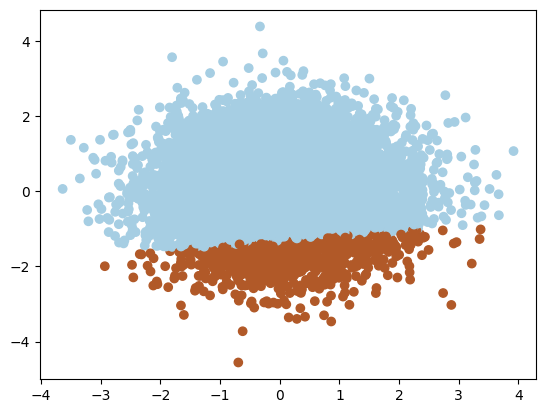

In [119]:
X, Y = generate_binary_dataset(10000,2)
plt.scatter(X[:, 1], X[:, 2], c=Y.flatten(), cmap=plt.cm.Paired)

#####With Theta

In [120]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n, m, theta):
    beta = np.random.normal(size=(m + 1, 1))
    X = np.hstack([np.ones((n, 1)), np.random.normal(size=(n, m))])
    noise = np.random.binomial(1, theta, size=(n, 1))
    p = 1 / (1 + np.exp(-X.dot(beta)))
    Y = (p > 0.5).astype(int)
    Z = Y^noise
    return X, Y, Z

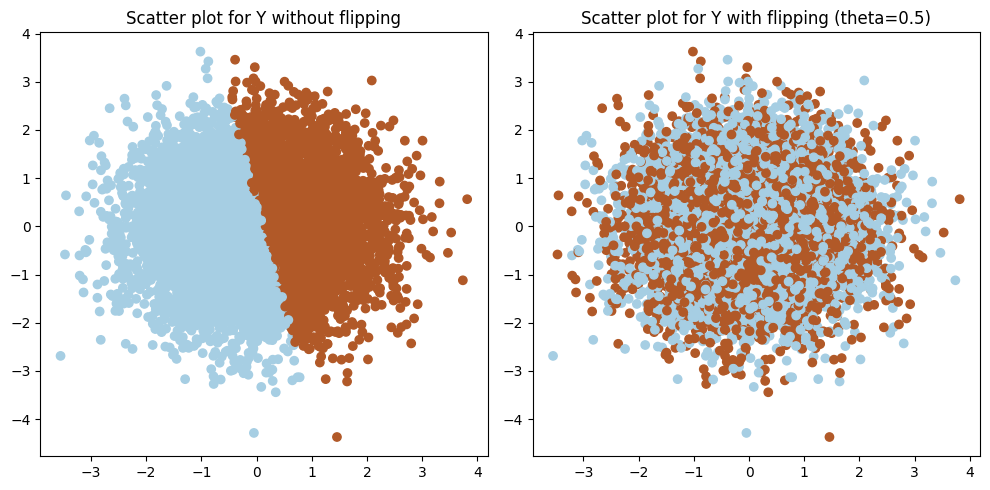

In [121]:
n,m,theta=10000,2,0.5
X, Y,Z= generate_data(n,m,theta)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(X[:, 1], X[:, 2], c=Y.flatten(), cmap=plt.cm.Paired, label='Y')
axs[0].set_title('Scatter plot for Y without flipping')
axs[1].scatter(X[:, 1], X[:, 2], c=Z.flatten(), cmap=plt.cm.Paired, label='Z')
axs[1].set_title(f"Scatter plot for Y with flipping (theta={theta})")
plt.tight_layout()
plt.show()

###Logisitic regression

In [122]:
def logistic_regression(X, Y, k, tau, lr):
    n, m = X.shape
    beta = np.random.normal(size=(m, 1))
    prev_cost = np.inf
    for i in range(k):
        p = 1 / (1 + np.exp(-X.dot(beta)))
        cost = -np.sum(Y*np.log(p) + (1-Y)*np.log(1-p))

        grad = X.T.dot(p - Y)
        beta -= lr * grad

        if np.linalg.norm(grad) < tau:
            break

        if np.abs(prev_cost - cost) < tau:
            break

        prev_cost = cost

    return beta, cost

In [123]:
X, Y, _ = generate_data(n=100, m=2, theta=0)
beta, _ = logistic_regression(X, Y, k=1000, tau=1e-5, lr=0.001)

p_pred = 1 / (1 + np.exp(-X.dot(beta)))

Y_pred = (p_pred > 0.5).astype(int)

#Visualizing the result

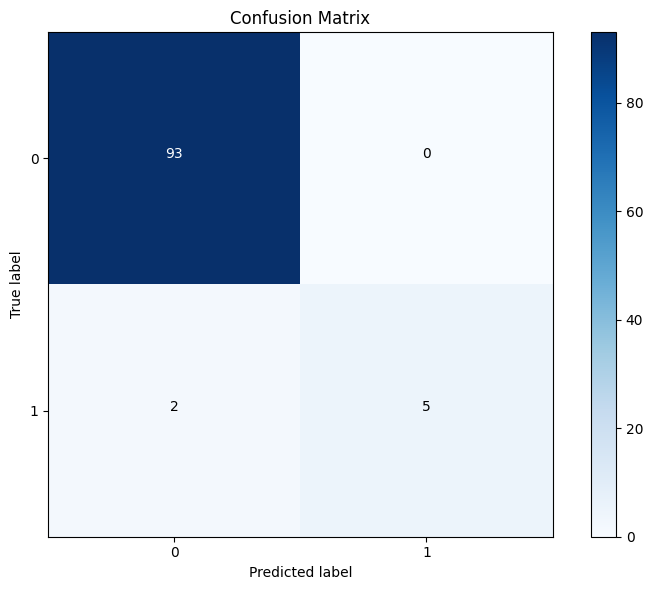

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y, Y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['0', '1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

##Part III

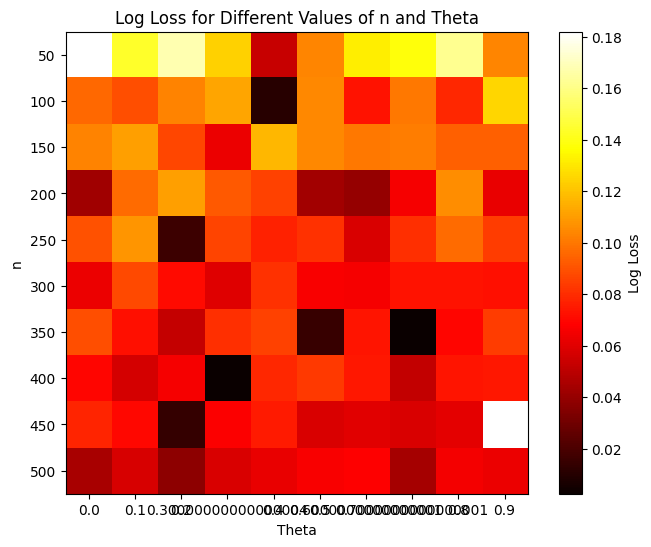

In [135]:
n_values = np.arange(50,550,50)
theta_values = np.arange(0,1,0.1)
log_loss_matrix = np.zeros((len(n_values), len(theta_values)))

for i, n in enumerate(n_values):
    for j, theta in enumerate(theta_values):
        X, Y, _ = generate_data(n=n, m=2, theta=theta)
        beta, _ = logistic_regression(X, Y, k=1000, tau=1e-5, lr=0.001)
        p_pred = 1 / (1 + np.exp(-X.dot(beta)))
        log_loss = -np.sum(Y*np.log(p_pred) + (1-Y)*np.log(1-p_pred)) / n
        log_loss_matrix[i, j] = log_loss
plt.figure(figsize=(8, 6))
plt.imshow(log_loss_matrix, cmap='hot', interpolation='nearest')
plt.colorbar(label='Log Loss')
plt.title('Log Loss for Different Values of n and Theta')
plt.xlabel('Theta')
plt.ylabel('n')
plt.xticks(np.arange(len(theta_values)), theta_values)
plt.yticks(np.arange(len(n_values)), n_values)
plt.show()

In [131]:
log_loss_matrix

array([[0.15165845, 0.15131971, 0.13243674, 0.12101508, 0.08774936,
        0.16249035, 0.11870839, 0.19070055, 0.01976571, 0.13800597],
       [0.1200808 , 0.08219272, 0.08176424, 0.11411279, 0.00973688,
        0.06920553, 0.10213377, 0.11421206, 0.12516135, 0.06253007],
       [0.09819562, 0.1197562 , 0.09533185, 0.04770217, 0.08357311,
        0.00670176, 0.09781732, 0.05238599, 0.08853236, 0.1018004 ],
       [0.11076425, 0.10220155, 0.07445904, 0.06484798, 0.06428997,
        0.07956313, 0.08824193, 0.09408642, 0.10038217, 0.00513614],
       [0.05244318, 0.08402372, 0.09340246, 0.07670869, 0.03299377,
        0.08276672, 0.08382552, 0.06117162, 0.08359182, 0.07649628],
       [0.0692659 , 0.0832587 , 0.07097553, 0.08665538, 0.06018065,
        0.00336113, 0.08379648, 0.06323996, 0.08634896, 0.0664785 ],
       [0.06941357, 0.06193004, 0.07453858, 0.07168461, 0.06807045,
        0.07960584, 0.09464046, 0.06736215, 0.07892208, 0.077657  ],
       [0.04631448, 0.06117613, 0.0725726

The logistic regression model is defined as:

p(y=1|x) = σ(βT x)

where σ is the sigmoid function:

σ(z) = 1/(1+e-z)

The cost function is the negative log likelihood:

J(β) = - ∑[ y log(p(y=1|x)) + (1-y) log(1-p(y=1|x)) ]

Substituting the model:

J(β) = - ∑[ y log(σ(βT x)) + (1-y) log(1- σ(βT x)) ]

To minimize J using gradient descent, we need the partial derivatives:

∂J/∂βj = - ∑[ y (1/σ(βT x)) (-xja )σ(βT x) + (1-y) (-1/(1-σ(βT x)))xja σ(βT x) ]

= ∑[ (σ(βT x) - y) xja ]

Where a = dσ(z)/dz is simply σ(z)(1-σ(z)) by the sigmoid derivative.

In vector form:

∂J/∂β = ∑[ (σ(βT x) - y) x ]

So the partial derivative of the cost function with respect to each parameter βj is the jth element of the vector sum.

This gradient is used to update the parameters β in each iteration of gradient descent to minimize the cost.